-------------------------------------------------------------------------------------------------------------
# 2020 05 13 Wednesday

# Linear Regression
###     (preliminary: Linear Model)
## 1. Library and Data, Preprocessing
## 2. Compute W and b with 3 methods 

## 3. [Advanced] Regularization: Ridge, Lasso

# Library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import torch
import torch.nn as nn # for neural network models
import torch.optim as optim # for optimization 
import torch.nn.init as init # for initialization 

# simple data (데이터 만들기)

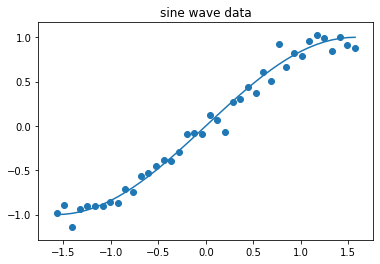

In [2]:
plt.figure()

# true data
N = 40 #전체 데이터의 개수
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N, 1) # 40 x 1 / -pi/2~ pi/2사이에서 40개의 데이터를 뽑아오는 함수 
y = np.sin(X)
plt.plot(X, y)
#reshape를 하지 않으면, x자체가 하나의 vector(매트릭스 상태가 되지 않음, 그냥 40개의 데이터)
# add noise
y += 0.1*np.random.randn(N, 1) #표준 정규 분포에서 가져와라, 실제 상황 처럼 오차를 주는 것

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

# Make feature

In [3]:
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1, 1) # 40 x 1 칼럼의 개수는 내가 정할테니 컴퓨터 너가 적절한 로그 찾아서 reshape 해줘라(-1)의 의미
for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
    #np.cocatenate: 매트릭스를 합치는 것
print('PHI.shape: ', PHI.shape) # 40 x 2
print('PHI[:3] \n', PHI[:3])

# shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape:  (40, 2)
PHI[:3] 
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


# Split train / test dataset

In [4]:
#원래는 test data train data가 서로 소속되지 않아야 함
n = N-20

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

# test data
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.         -0.44304512]
 [ 1.         -1.16802804]
 [ 1.          0.44304512]
 [ 1.         -0.36249146]
 [ 1.         -0.76525975]
 [ 1.         -0.2819378 ]
 [ 1.          1.16802804]
 [ 1.         -0.12083049]
 [ 1.         -1.08747438]
 [ 1.          0.68470609]
 [ 1.          0.76525975]
 [ 1.          0.92636706]
 [ 1.          0.2819378 ]
 [ 1.          0.52359878]
 [ 1.          1.32913535]
 [ 1.          1.2485817 ]
 [ 1.         -0.20138414]
 [ 1.         -1.00692072]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]
(20, 2)
[[ 1.         -0.44304512]
 [ 1.         -1.16802804]
 [ 1.          0.44304512]
 [ 1.         -0.36249146]
 [ 1.         -0.76525975]
 [ 1.         -0.2819378 ]
 [ 1.          1.16802804]
 [ 1.         -0.12083049]
 [ 1.         -1.08747438]
 [ 1.          0.68470609]
 [ 1.          0.76525975]
 [ 1.          0.92636706]
 [ 1.          0.2819378 ]
 [ 1.          0.52359878]
 [ 1.          1.32913535]
 [ 1.          1.2485817 ]
 [ 1.         -0.20

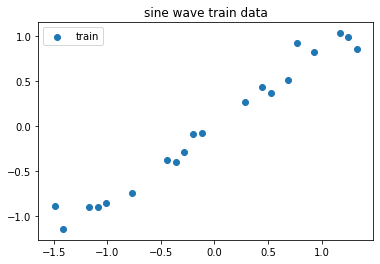

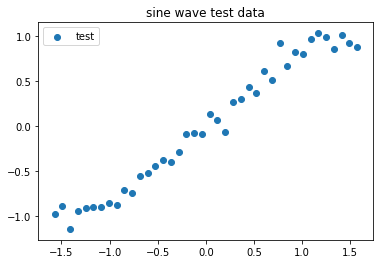

In [5]:
# plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Linear Regression (Formula) 해석적
## method 1: compute W and b with numpy

In [6]:
# compute W_ with PHI_train.
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
#(X^T * Y)^-1 * X*Y
#numpy에서 @는 매트릭스간의 곱을 의미
print('[b, W] = W_')
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

[b, W] = W_
W_.shape:  (2, 1)
W_ 
 [[0.01259626]
 [0.79540069]]


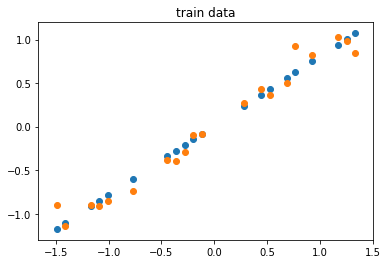

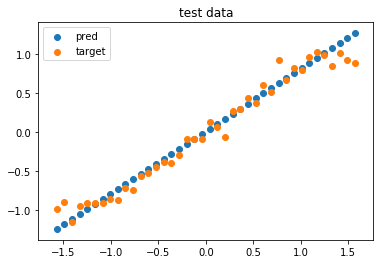

In [7]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='pred') #예측 값
plt.scatter(X_train, y_train, label='target') #실제 값
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='pred') #에측 값
plt.scatter(X_test, y_test, label='target') #실제 값
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula) 
## method 2: compute W and b with sklearn library

In [8]:
reg = LinearRegression()
#위에서 구현한 것 과 동일
reg.fit(X_train, y_train)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

b:  [0.01259626]
W:  [[0.79540069]]


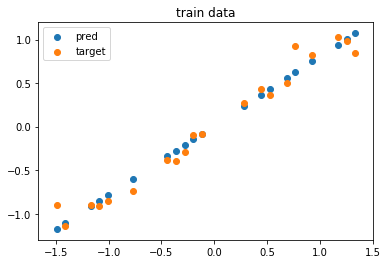

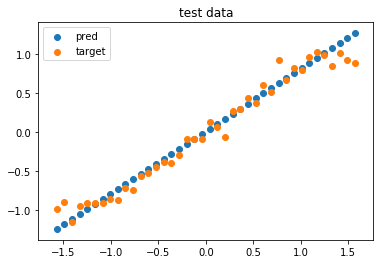

In [9]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula) 수치적
## method 3: compute W and b with pytorch library (Gradient Descent)

In [10]:
# prepare data
PHI_train = torch.tensor(PHI_train, dtype = torch.float) # if PHI_train is numpy.array
label = torch.tensor(y_train, dtype=torch.float)

# prepare model
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function 
loss_function = nn.MSELoss() #Mean of Squre Error
optimizer = optim.SGD(model.parameters(), lr = 0.1) #Stochastic Gradient Descent
#(학습 시키고자 하는 모델의 파라미터, learning rate)

# train the model 
for i in range(100): #100 epcoh
    optimizer.zero_grad() #tensor 내의 gradient값을 0으로 초기화
    output = model(PHI_train) #모델에 데이터 대입
    
    loss = loss_function(output, label) #loss 계산
    
    loss.backward() #gradient 계산
    optimizer.step() #계산 한 것을 토대로 파라미터 업데이트
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('W_ \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = torch.tensor(PHI_test, dtype = torch.float)

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

tensor(1.3763)
tensor(0.0588)
tensor(0.0164)
tensor(0.0150)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
W_ 
 tensor(0.0126, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7954, grad_fn=<SelectBackward>)


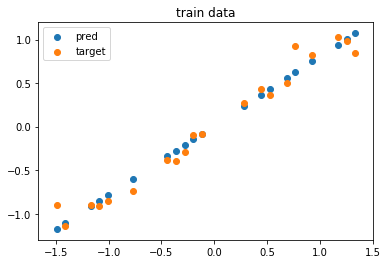

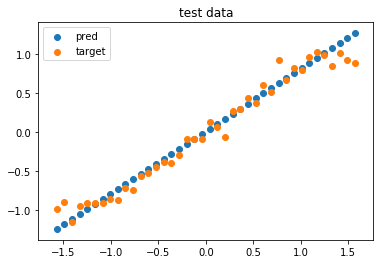

In [11]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Advacned: Regularization (Ridge, Lasso)

In [12]:
# prepare data
PHI_train = PHI_train.clone().detach() # if PHI_train is torch.tensor
label = label.clone().detach() #데이터 텐서로 만들어 주는 것

# prepare model
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function / 이전과 동일
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

#train model
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    # L1 regularization / Loss + 파라미터의 절대값 전부 
    regularization_loss = 0
    for param in model.parameters():
        regularization_loss += torch.sum(torch.abs(param))
    
    regularization_loss_cofficient=0.01
    loss = regularization_loss_cofficient*regularization_loss + loss
    
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('b \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = PHI_test.clone().detach()

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

tensor(1.0358)
tensor(0.0478)
tensor(0.0160)
tensor(0.0150)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
b 
 tensor(0.0126, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7954, grad_fn=<SelectBackward>)


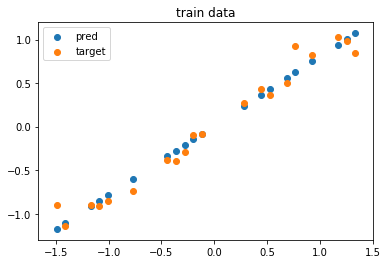

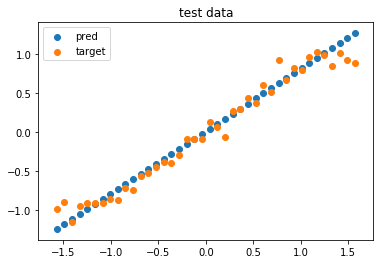

In [13]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [16]:
# prepare data
PHI_train = PHI_train.clone().detach() # same with PHI_train = torch.tensor(PHI_train, dtype = torch.float)
label = label.clone().detach()

# prepare model 
model = nn.Linear(n_feature, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare loss function
loss_function = nn.MSELoss()

# L2 reguliarzation
optimizer = optim.SGD(model.parameters(), lr = 0.1, weight_decay = 0.01)
#weight_decay(=regularization_loss_cofficient)에 인자 값 넣기

# train the model
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('b \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

PHI_test = PHI_test.clone().detach() # same with PHI_train = torch.tensor(PHI_train, dtype = torch.float)

y_train_pred = model(PHI_train)
y_test_pred = model(PHI_test)

y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

tensor(1.7388)
tensor(0.0616)
tensor(0.0166)
tensor(0.0150)
tensor(0.0150)
tensor(0.0150)
tensor(0.0150)
tensor(0.0149)
tensor(0.0149)
tensor(0.0149)
b 
 tensor(0.0123, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7904, grad_fn=<SelectBackward>)


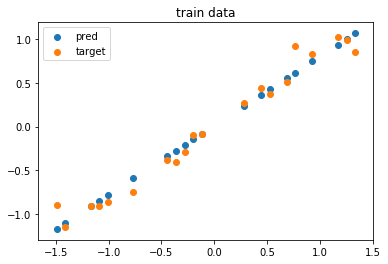

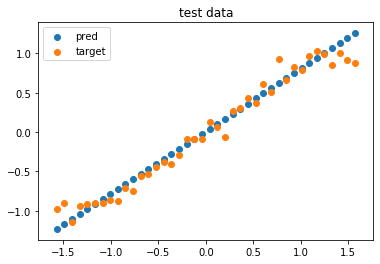

In [15]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

-----------------------------------------------------